### Diabetic Retinopathy Classification: From Multi-Grade to Clinical Categories

### Retinopathy Grading & Macular Edema Risk Explained

Each fundus image is annotated using two independent clinical indicators. These are combined to derive a final, clinically actionable class.

#### 1. Diagnostic Annotation Schema

| Clinical Indicator              | Grade/Risk | Clinical Meaning                            |
|---------------------------------|------------|---------------------------------------------|
| **Retinopathy Grade (`grade`)** | 0          | No Diabetic Retinopathy (Healthy)           |
|                                 | 1          | Mild Non-Proliferative DR (NPDR)            |
|                                 | 2          | Moderate NPDR                               |
|                                 | 3          | Severe NPDR                                 |
|                                 | 4          | Proliferative DR (PDR)                      |
| **Macular Edema Risk (`risk`)** | 0          | No macular edema                            |
|                                 | 1          | Possible / non-significant risk             |
|                                 | 2          | Clinically Significant Macular Edema (CSME) |

#### Classification Categories

Based on the combination of `grade` and `risk`, each image is assigned to **one** of the following categories:

1. **No_DR**: Healthy retina with no signs of diabetic retinopathy.
2. **Mild_Moderate_NPDR**: Early to moderate stages of non-proliferative diabetic retinopathy without clinically significant macular edema.
3. **Severe_PDR**: Advanced diabetic retinopathy, including severe NPDR and proliferative DR, where disease severity dominates clinical priority.
4. **Clinically_Significant_Macular_Edema**: Vision-threatening macular edema cases, prioritized unless overridden by proliferative DR.

The table below summarizes the full logic across all possible combinations of `grade` and `risk`.

#### Diabetic Retinopathy Classification Table

| Grade | Risk | Class                                  | Explanation                                                                                |
|-------|------|----------------------------------------|--------------------------------------------------------------------------------------------|
| 0     | 0    | `No_DR`                                | Healthy retina, no signs of DR or macular edema                                            |
| 0     | 1    | `No_DR`                                | Still healthy; risk flag alone doesn’t indicate retinopathy                                |
| 0     | 2    | `Clinically_Significant_Macular_Edema` | No DR, but **macular edema is vision-threatening**, so it's prioritized                    |
| 1     | 0    | `Mild_Moderate_NPDR`                   | Mild NPDR, no CSME — early-stage DR                                                        |
| 1     | 1    | `Mild_Moderate_NPDR`                   | Mild NPDR with minor edema risk — still not CSME                                           |
| 1     | 2    | `Clinically_Significant_Macular_Edema` | Mild DR **with CSME**, so we prioritize the edema                                          |
| 2     | 0    | `Mild_Moderate_NPDR`                   | Moderate NPDR, no CSME                                                                     |
| 2     | 1    | `Mild_Moderate_NPDR`                   | Moderate NPDR with minor edema risk                                                        |
| 2     | 2    | `Clinically_Significant_Macular_Edema` | Moderate NPDR **with CSME** — again, CSME is prioritized                                   |
| 3     | 0    | `Severe_PDR`                           | Severe NPDR, but no CSME → considered advanced stage                                       |
| 3     | 1    | `Severe_PDR`                           | Severe NPDR, edema risk not significant — default to severe DR                             |
| 3     | 2    | `Clinically_Significant_Macular_Edema` | Severe NPDR **with CSME** → CSME takes priority                                            |
| 4     | 0    | `Severe_PDR`                           | Proliferative DR (worst stage), regardless of edema                                        |
| 4     | 1    | `Severe_PDR`                           | PDR with minor edema — still the worst DR stage                                            |
| 4     | 2    | `Severe_PDR`                           | Even though CSME is present, **PDR takes full priority** as it's the most severe condition |


In [ ]:
import pandas as pd
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [2]:
train_data_dir = "../data/IDRiD/Train"
test_data_dir = "../data/IDRiD/Test"

train_data = pd.read_csv(Path(train_data_dir)/"annotations.csv")
test_data = pd.read_csv(Path(test_data_dir)/"annotations.csv")
# drop caption
train_data = train_data.drop(columns=["caption"])
test_data = test_data.drop(columns=["caption"])

In [3]:
print("Train data null values:\n", train_data.isnull().sum())
print("Test data null values:\n", test_data.isnull().sum())
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print(train_data.columns)
train_data.head()


Train data null values:
 Image name               0
Retinopathy grade        0
Risk of macular edema    0
class                    0
dtype: int64
Test data null values:
 Image name               0
Retinopathy grade        0
Risk of macular edema    0
class                    0
dtype: int64
Train data shape: (1239, 4)
Test data shape: (309, 4)
Index(['Image name', 'Retinopathy grade', 'Risk of macular edema', 'class'], dtype='object')


,Image name,Retinopathy grade,Risk of macular edema,class
0,IDRiD_0001.jpg,0,0,No_DR
1,IDRiD_0002.jpg,1,0,Mild_Moderate_NPDR
2,IDRiD_0003.jpg,2,2,Clinically_Significant_Macular_Edema
3,IDRiD_0004.jpg,0,0,No_DR
4,IDRiD_0005.jpg,3,2,Clinically_Significant_Macular_Edema


### Grade distibution


                   train_count  train_percentage  test_count  test_percentage
Retinopathy grade                                                            
0                          402             32.45         102            33.01
1                           60              4.84          15             4.85
2                          408             32.93          96            31.07
3                          222             17.92          57            18.45
4                          147             11.86          39            12.62


<Figure size 640x480 with 0 Axes>

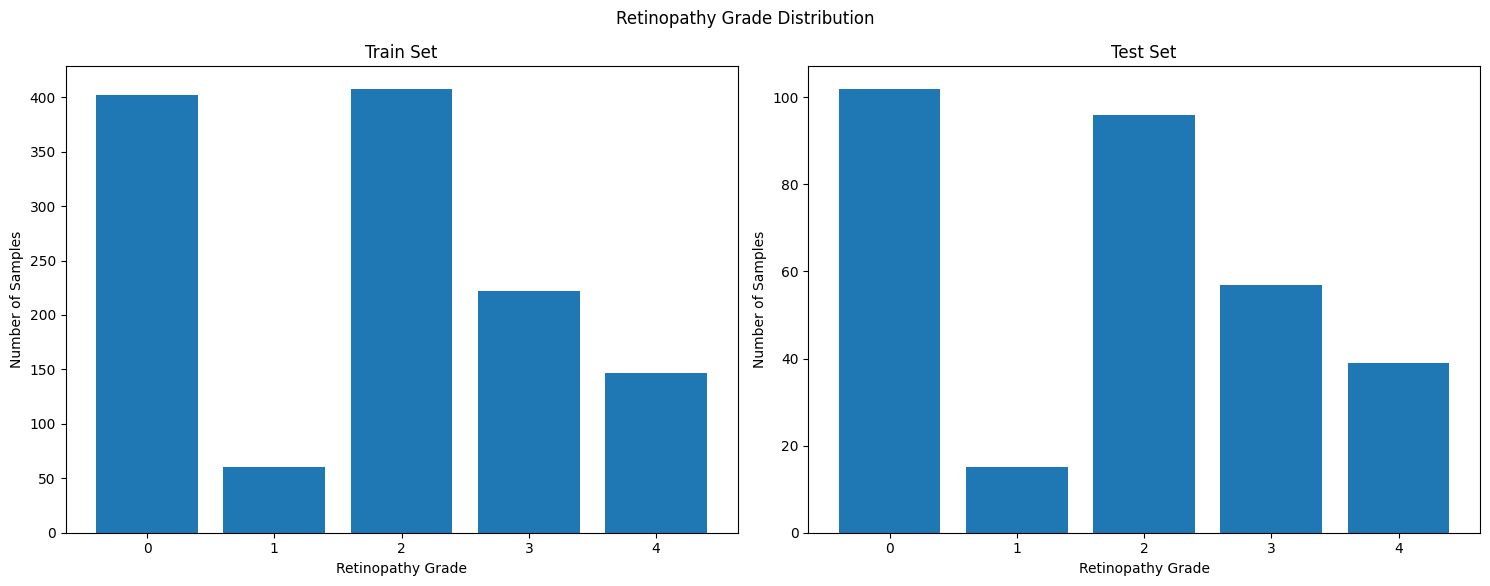

In [4]:
# Train
train_counts = train_data['Retinopathy grade'].value_counts().sort_index()
train_percent = train_counts / train_counts.sum() * 100

# Validation
test_counts = test_data['Retinopathy grade'].value_counts().sort_index()
test_percent = test_counts / test_counts.sum() * 100

# Combined summary
grade_summary = pd.DataFrame({
    'train_count': train_counts,
    'train_percentage': train_percent.round(2),
    'test_count': test_counts,
    'test_percentage': test_percent.round(2)
}).fillna(0)

print(grade_summary)

plt.figure()

# Train distribution
train_grade_counts = train_data['Retinopathy grade'].value_counts().sort_index()

# Validation distribution
test_grade_counts = test_data['Retinopathy grade'].value_counts().sort_index()

plt.figure(figsize=(15, 7))

# Subplot 1: Train
plt.subplot(1, 2, 1)
plt.bar(train_grade_counts.index, train_grade_counts.values)
plt.xlabel("Retinopathy Grade")
plt.ylabel("Number of Samples")
plt.title("Train Set")

# Subplot 2: Validation
plt.subplot(1, 2, 2)
plt.bar(test_grade_counts.index, test_grade_counts.values)
plt.xlabel("Retinopathy Grade")
plt.ylabel("Number of Samples")
plt.title("Test Set")

plt.suptitle("Retinopathy Grade Distribution")
plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()

### Macular Edema Risk Distribution

                       count  percentage
Risk of macular edema                   
0                        531       42.86
1                        123        9.93
2                        585       47.22


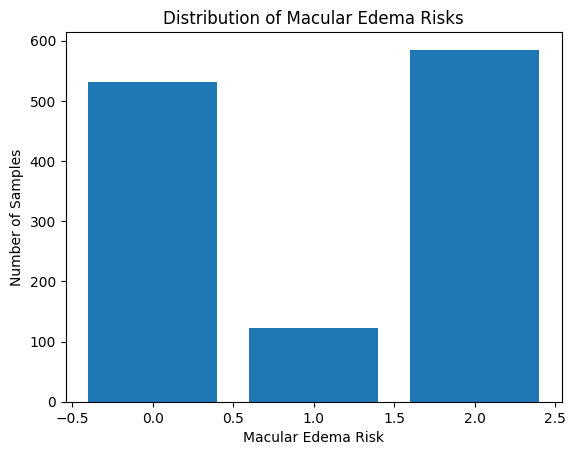

In [5]:
risk_counts = train_data['Risk of macular edema'].value_counts().sort_index()
risk_percent = risk_counts / risk_counts.sum() * 100

risk_summary = pd.DataFrame({
    'count': risk_counts,
    'percentage': risk_percent.round(2)
})

print(risk_summary)

plt.figure()
plt.bar(risk_counts.index, risk_counts.values)
plt.xlabel("Macular Edema Risk")
plt.ylabel("Number of Samples")
plt.title("Distribution of Macular Edema Risks")
plt.show()

### Grade and Risk Together

Risk of macular edema    0   1    2
Retinopathy grade                  
0                      402   0    0
1                       60   0    0
2                       48  99  261
3                        9  12  201
4                       12  12  123


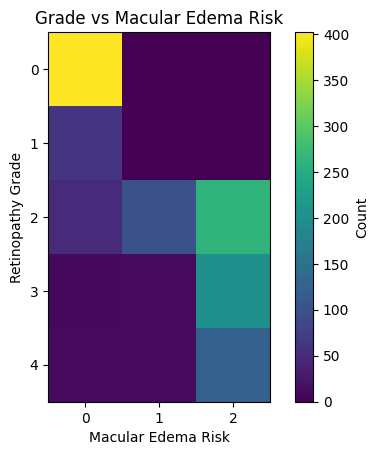

In [6]:
grade_risk_ct = pd.crosstab(train_data['Retinopathy grade'], train_data['Risk of macular edema'])
print(grade_risk_ct)

plt.figure()
plt.imshow(grade_risk_ct.values)
plt.colorbar(label="Count")
plt.xticks(range(len(grade_risk_ct.columns)), grade_risk_ct.columns)
plt.yticks(range(len(grade_risk_ct.index)), grade_risk_ct.index)
plt.xlabel("Macular Edema Risk")
plt.ylabel("Retinopathy Grade")
plt.title("Grade vs Macular Edema Risk")
plt.show()


### Class Distribution


Majority class count: 462
Minority class count: 168
Imbalance ratio: 2.75
Majority class count: 126
Minority class count: 24
Imbalance ratio : 5.25
                                      train_count  train_percentage
class                                                              
Clinically_Significant_Macular_Edema          462             37.29
No_DR                                         402             32.45
Mild_Moderate_NPDR                            207             16.71
Severe_PDR                                    168             13.56
                                      test_count  test_percentage
class                                                            
Clinically_Significant_Macular_Edema         126            40.78
No_DR                                        102            33.01
Severe_PDR                                    57            18.45
Mild_Moderate_NPDR                            24             7.77


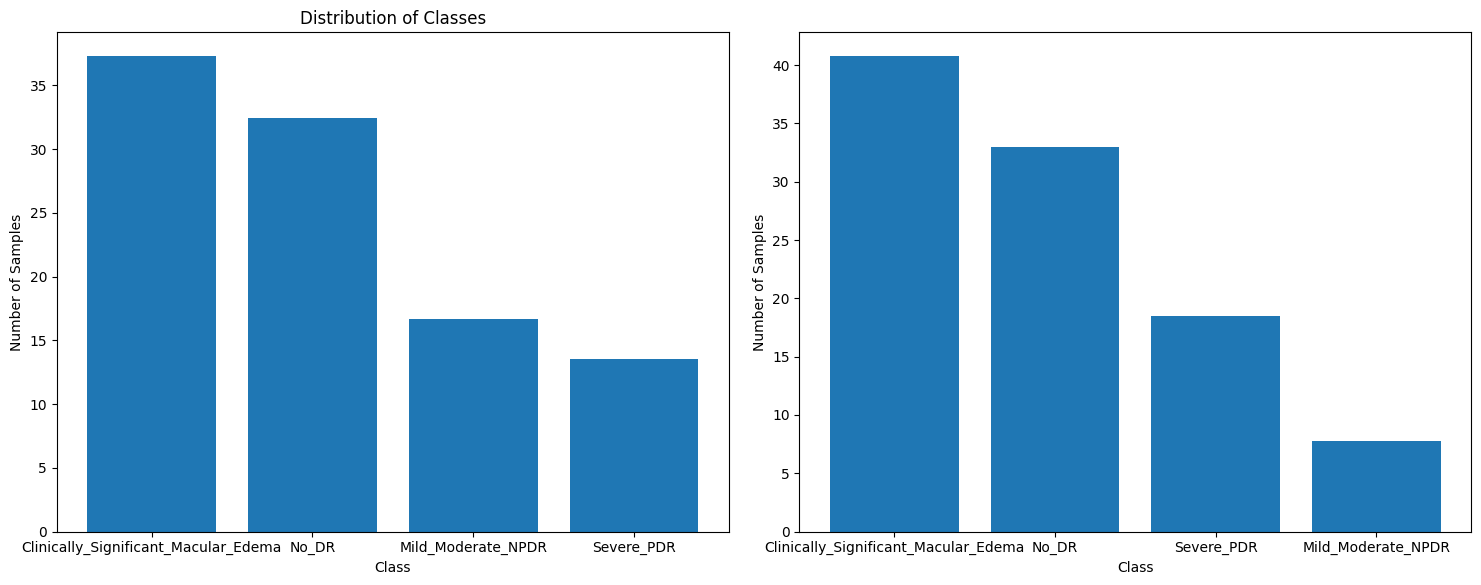

In [7]:
train_counts = train_data['class'].value_counts()
train_percent = train_counts / train_counts.sum() * 100
train_majority_class = train_counts.max()
train_minority_class = train_counts.min()
train_imbalance_ratio = train_majority_class / train_minority_class

print("Majority class count:", train_majority_class)
print("Minority class count:", train_minority_class)
print("Imbalance ratio:", round(train_imbalance_ratio, 2))

test_counts = test_data['class'].value_counts()
test_percent = test_counts / test_counts.sum() * 100
test_majority_class = test_counts.max()
test_minority_class = test_counts.min()
test_imbalance_ratio = test_majority_class / test_minority_class

print("Majority class count:", test_majority_class)
print("Minority class count:", test_minority_class)
print("Imbalance ratio :", round(test_imbalance_ratio, 2))


train_class_summary = pd.DataFrame({
    'train_count': train_counts,
    'train_percentage': train_percent.round(2),
})

print(train_class_summary)

test_class_summary = pd.DataFrame({
    'test_count': test_counts,
    'test_percentage': test_percent.round(2),
})

print(test_class_summary)

plt.figure(figsize=(15, 7))

# Subplot 1: Train
plt.subplot(1, 2, 1)
plt.bar(train_counts.index, train_percent.values)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes")

# Subplot 2: Test
plt.subplot(1, 2, 2)
plt.bar(test_counts.index, test_percent.values)
plt.xlabel("Class")
plt.ylabel("Number of Samples")

plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()

../data/IDRiD/Train/images/IDRiD_0613.jpg
../data/IDRiD/Train/images/IDRiD_0909.jpg
../data/IDRiD/Train/images/IDRiD_1108.jpg
../data/IDRiD/Train/images/IDRiD_0855.jpg


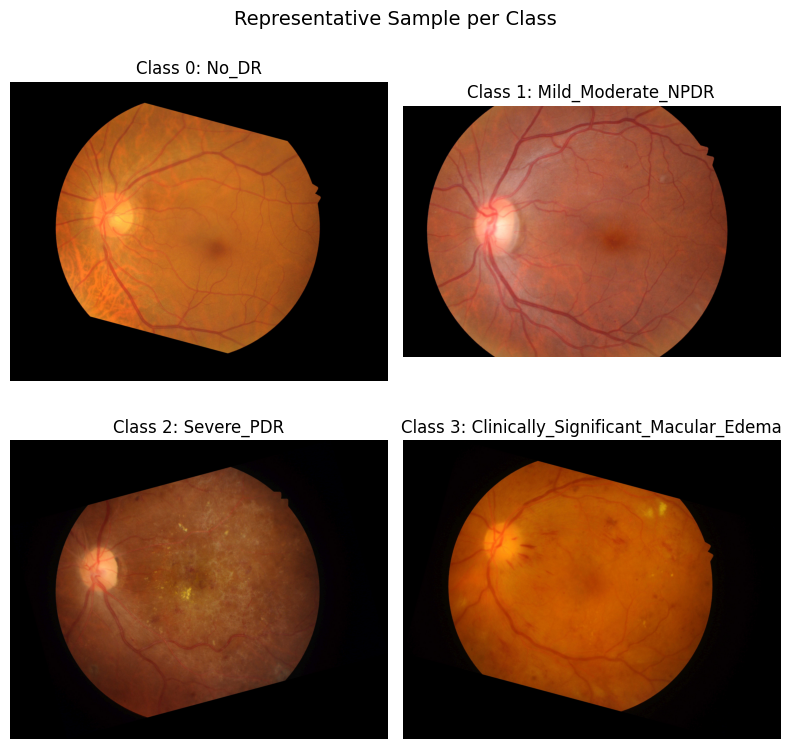

In [8]:
class_map = {
    "No_DR": 0,
    "Mild_Moderate_NPDR": 1,
    "Severe_PDR": 2,
    "Clinically_Significant_Macular_Edema": 3
}
# add image_path column
train_data['image_path'] = train_data['Image name'].apply(lambda x: Path(train_data_dir)/"images"/f"{x}")
test_data['image_path'] = test_data['Image name'].apply(lambda x: Path(test_data_dir)/"images"/f"{x}")

# Pick one image per class
sample_images = (
    train_data
    .groupby('class', group_keys=False)
    .sample(n=1, random_state=42)
    .reset_index(drop=True)
)

plt.figure(figsize=(8, 8))

for i, row in sample_images.iterrows():
    class_name = row['class']
    class_id = class_map[class_name]
    img_path = row['image_path']
    print(img_path)
    
    img = mpimg.imread(img_path)

    plt.subplot(2, 2, class_id + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Class {class_id}: {class_name}")

plt.suptitle("Representative Sample per Class", fontsize=14)
plt.tight_layout()
plt.show()
